# 📊 Sudoku Dataset Analysis & Visualization
## Complete Statistical Analysis with Beautiful Plots

# 📊 Sudoku Dataset Analysis & Visualization
## Complete Statistical Analysis with Beautiful Plots

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [4]:
# Load dataset
df = pd.read_csv('sudoku_filtered.csv')

print(f"✅ Dataset loaded!")
print(f"📊 Total puzzles: {len(df)}")
print(f"📋 Columns: {list(df.columns)}")

✅ Dataset loaded!
📊 Total puzzles: 5000
📋 Columns: ['source', 'question', 'answer', 'rating']


In [5]:
# Display first rows
print("First 10 Puzzles:")
df.head(10)

First 10 Puzzles:


,source,question,answer,rating
0,puzzles4_forum_hardest_1905,.5....7....3.8..9...926...4..8.1..6.........5....,8529437164631875927192653842785149633967281451...,42
1,puzzles4_forum_hardest_1905,...........86.4...57..8..6.85..6..3..9......2....,4615237899286741535731892648542679311963485722...,53
2,puzzles4_forum_hardest_1905,9...7..4...6...5.7...3....9.8.....1.5...4.7......,9185762433469215872573841696827593145918437264...,26
3,puzzles1_unbiased,6.3...7............4.7..28....62..3.8.1.5....4...,6834127592753981461497652835976248318219534674...,3
4,puzzles4_forum_hardest_1905,...9.1..5.5..7.6..1.....7.......2.6.5...9...7....,4789612353524786911965237488197325645248963177...,23
5,puzzles4_forum_hardest_1905,..4......1...7.2...2.8...5.7....4.....2.9.3......,5941328671869752343278469517153846296425973189...,43
6,puzzles4_forum_hardest_1905,2...5...7..7..36...8.7...1...6.3.7..9.......3....,2631594871574836924897263158165327499426178533...,37
7,puzzles1_unbiased,7.9.1......32.8.5....3..6.9.4.....97.............,7896154324632987515123746891468523973984672152...,0
8,01_file1,.5...8...2...4...........71.92..5..4..462.8..6...,7569184322317465899482536711923857645746218936...,33
9,puzzles4_forum_hardest_1905,..58.......2...1...3..2...5.....48..3...9...6....,9158436277426591388367219456215748933742985165...,48


In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,rating
count,5000.000000
mean,22.061600
std,23.207678
min,0.000000
25%,3.000000
50%,16.000000
75%,34.000000
max,313.000000


In [7]:
# Create difficulty categories
def categorize_difficulty(rating):
    if rating <= 50:
        return 'Easy'
    elif rating <= 100:
        return 'Medium'
    elif rating <= 200:
        return 'Hard'
    else:
        return 'Expert'

df['difficulty'] = df['rating'].apply(categorize_difficulty)

print("Difficulty Statistics:")
print(f"Min Rating: {df['rating'].min()}")
print(f"Max Rating: {df['rating'].max()}")
print(f"Average: {df['rating'].mean():.2f}")
print(f"Median: {df['rating'].median():.2f}")

Difficulty Statistics:
Min Rating: 0
Max Rating: 313
Average: 22.06
Median: 16.00


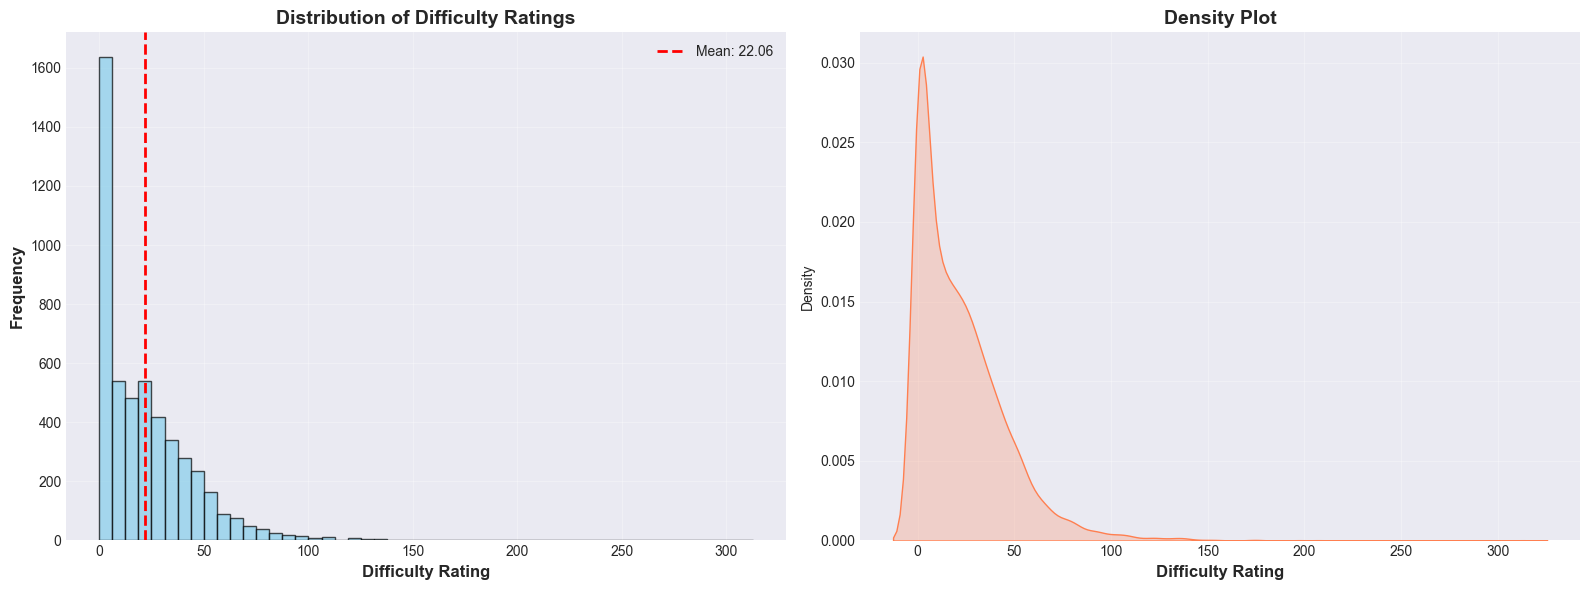

In [8]:
# Histogram and KDE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['rating'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["rating"].mean():.2f}')
axes[0].set_xlabel('Difficulty Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Difficulty Ratings', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# KDE Plot
sns.kdeplot(data=df, x='rating', fill=True, ax=axes[1], color='coral')
axes[1].set_xlabel('Difficulty Rating', fontsize=12, fontweight='bold')
axes[1].set_title('Density Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

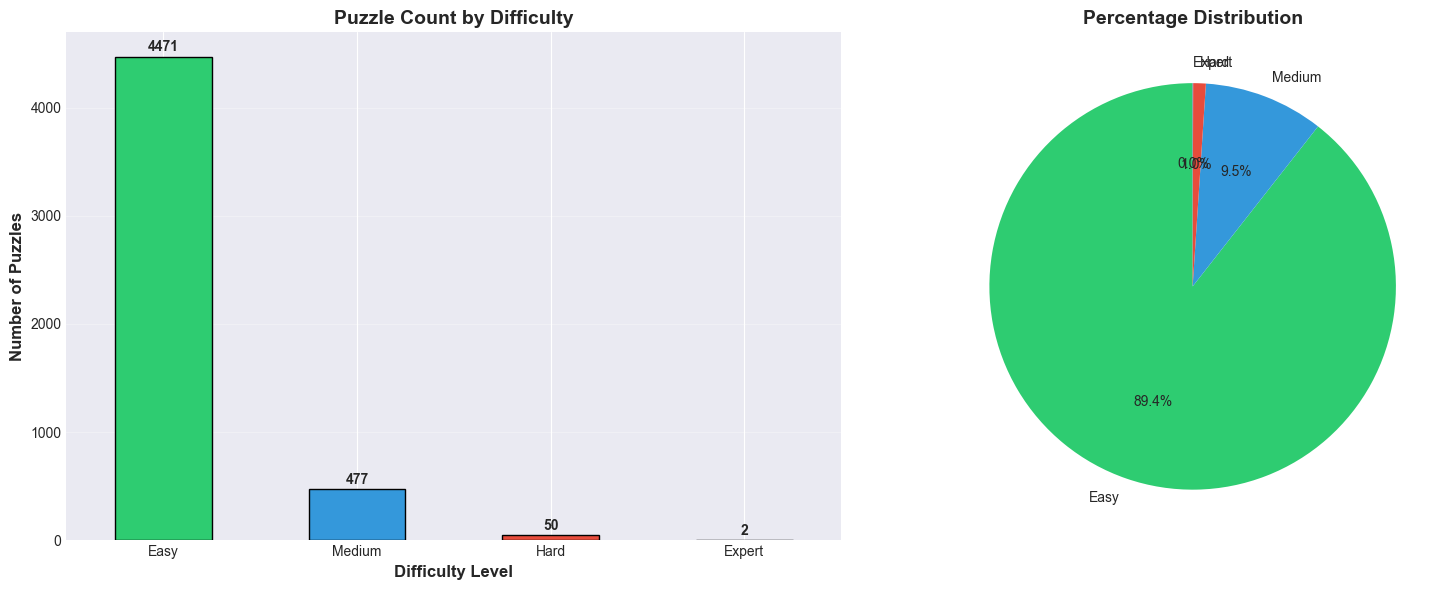


Difficulty Distribution:
Easy      : 4471 puzzles (89.42%)
Medium    :  477 puzzles ( 9.54%)
Hard      :   50 puzzles ( 1.00%)
Expert    :    2 puzzles ( 0.04%)


In [9]:
# Bar chart and Pie chart
difficulty_counts = df['difficulty'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6']
difficulty_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_xlabel('Difficulty Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Puzzles', fontsize=12, fontweight='bold')
axes[0].set_title('Puzzle Count by Difficulty', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(difficulty_counts):
    axes[0].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print stats
print("\nDifficulty Distribution:")
for level, count in difficulty_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{level:10s}: {count:4d} puzzles ({percentage:5.2f}%)")

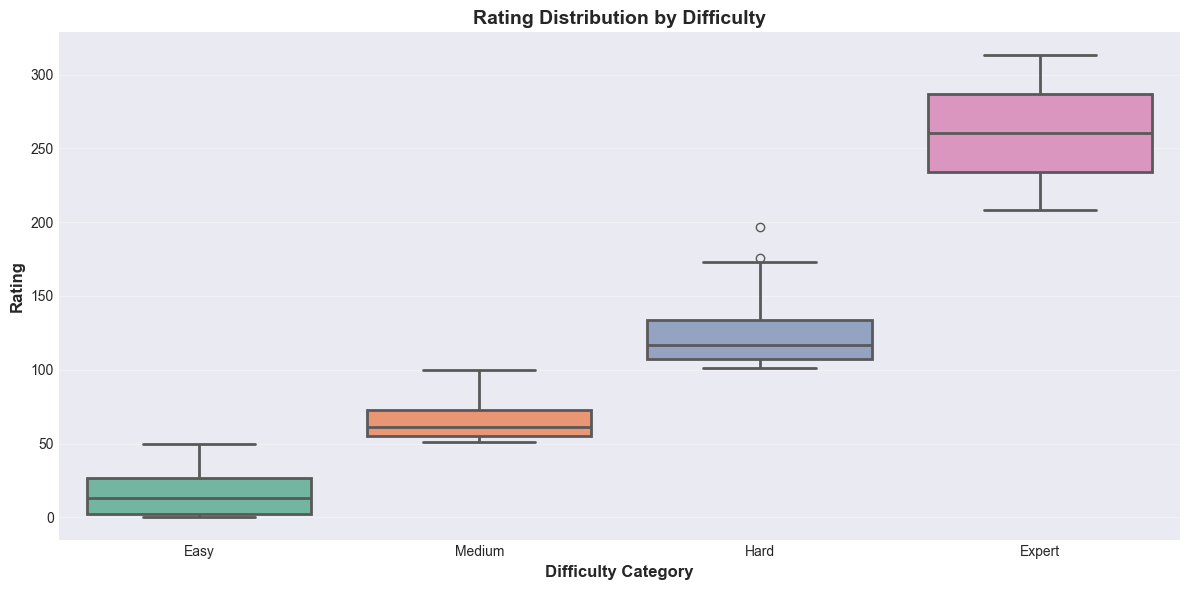

In [10]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='difficulty', y='rating', palette='Set2', linewidth=2)
plt.xlabel('Difficulty Category', fontsize=12, fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.title('Rating Distribution by Difficulty', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

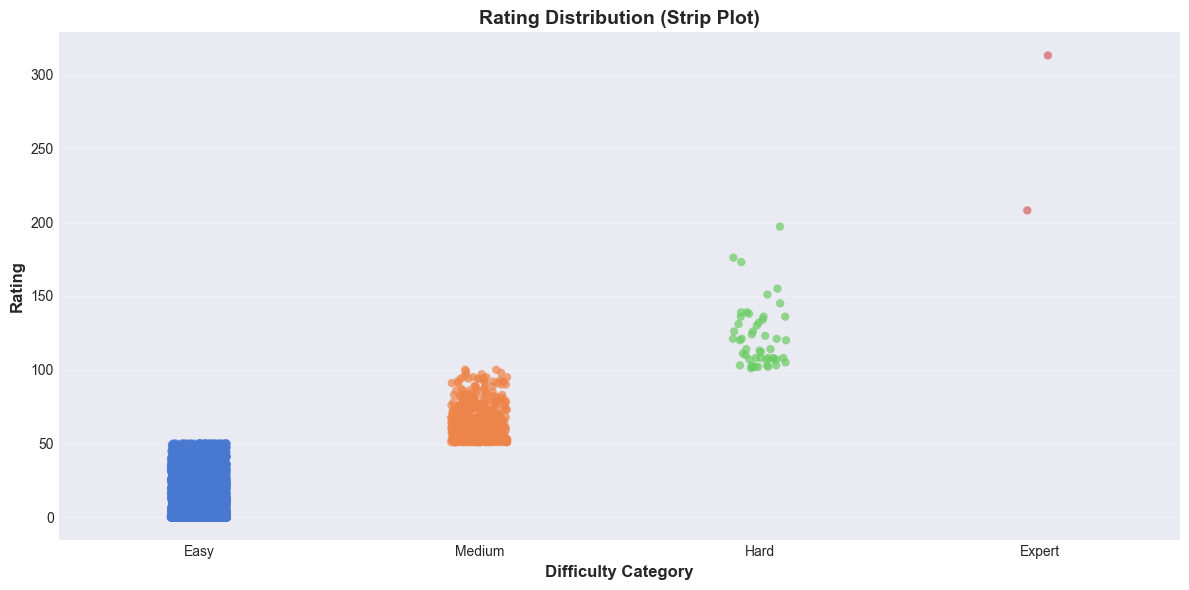

In [21]:

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='difficulty', y='rating', palette='muted', jitter=True, size=6, alpha=0.7)
plt.xlabel('Difficulty Category', fontsize=12, fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.title('Rating Distribution (Strip Plot)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


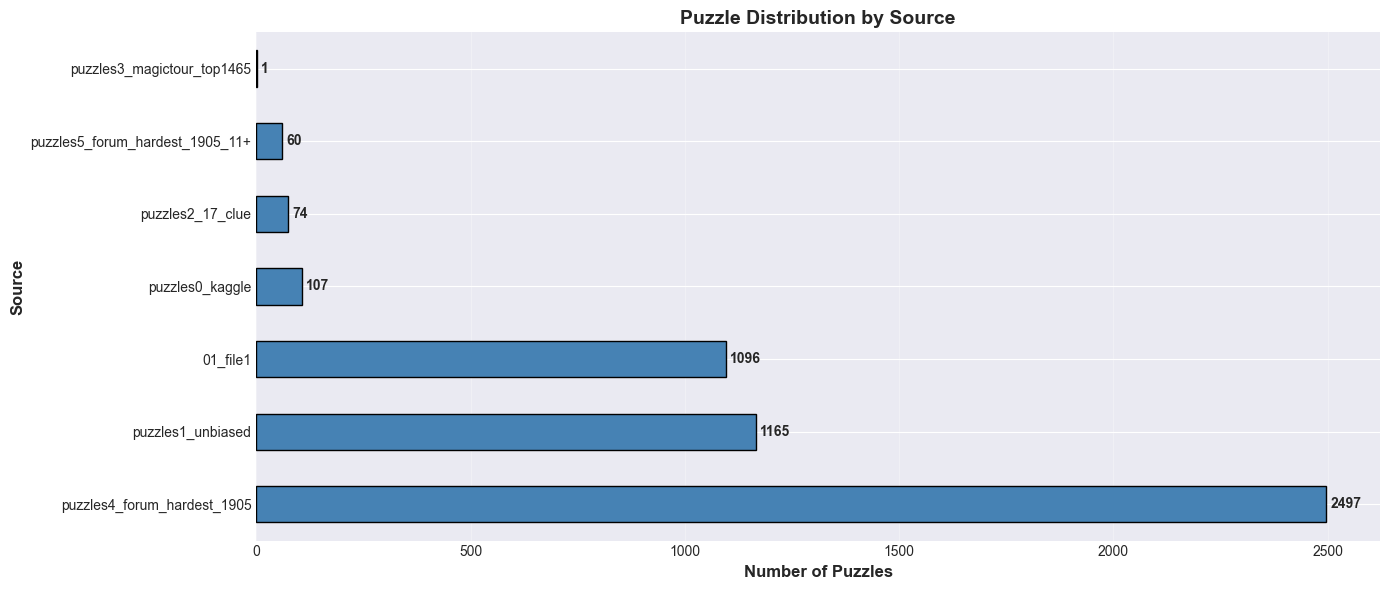

In [12]:
# Source distribution
source_counts = df['source'].value_counts()

plt.figure(figsize=(14, 6))
source_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Number of Puzzles', fontsize=12, fontweight='bold')
plt.ylabel('Source', fontsize=12, fontweight='bold')
plt.title('Puzzle Distribution by Source', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(source_counts):
    plt.text(v + 10, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

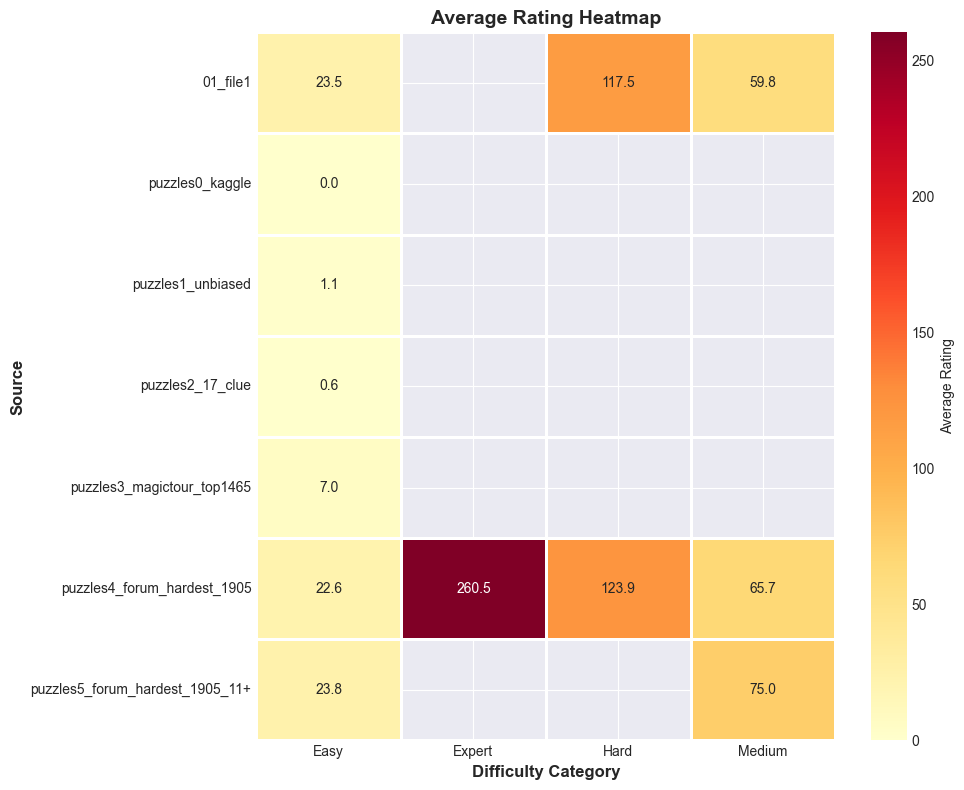

In [24]:
# Heatmap - Average Rating
pivot_table = df.pivot_table(values='rating', index='source', columns='difficulty', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=1, 
            cbar_kws={'label': 'Average Rating'})
plt.xlabel('Difficulty Category', fontsize=12, fontweight='bold')
plt.ylabel('Source', fontsize=12, fontweight='bold')
plt.title('Average Rating Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
# Empty cells analysis
def count_empty_cells(puzzle_string):
    return puzzle_string.count('.') + puzzle_string.count('0')

df['empty_cells'] = df['question'].apply(count_empty_cells)

print("Empty Cells Statistics:")
print(f"Min: {df['empty_cells'].min()}")
print(f"Max: {df['empty_cells'].max()}")
print(f"Average: {df['empty_cells'].mean():.2f}")

Empty Cells Statistics:
Min: 45
Max: 64
Average: 55.83


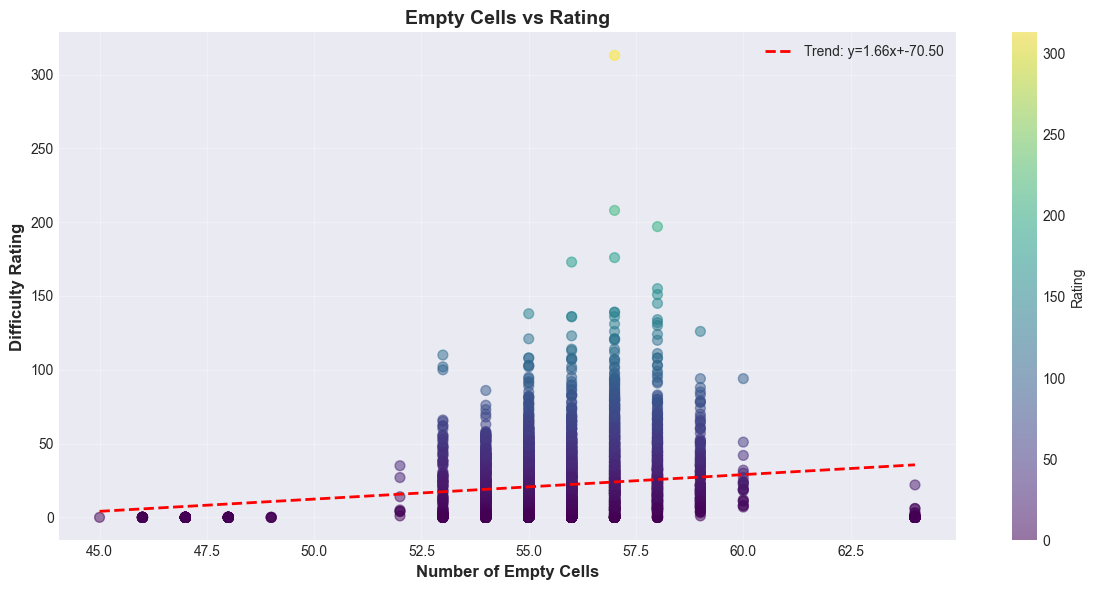


Correlation: 0.1515


In [15]:
# Scatter plot - Correlation
plt.figure(figsize=(12, 6))
plt.scatter(df['empty_cells'], df['rating'], alpha=0.5, c=df['rating'], cmap='viridis', s=50)
plt.colorbar(label='Rating')
plt.xlabel('Number of Empty Cells', fontsize=12, fontweight='bold')
plt.ylabel('Difficulty Rating', fontsize=12, fontweight='bold')
plt.title('Empty Cells vs Rating', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Trend line
z = np.polyfit(df['empty_cells'], df['rating'], 1)
p = np.poly1d(z)
plt.plot(df['empty_cells'].sort_values(), p(df['empty_cells'].sort_values()), 
         "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

correlation = df['empty_cells'].corr(df['rating'])
print(f"\nCorrelation: {correlation:.4f}")

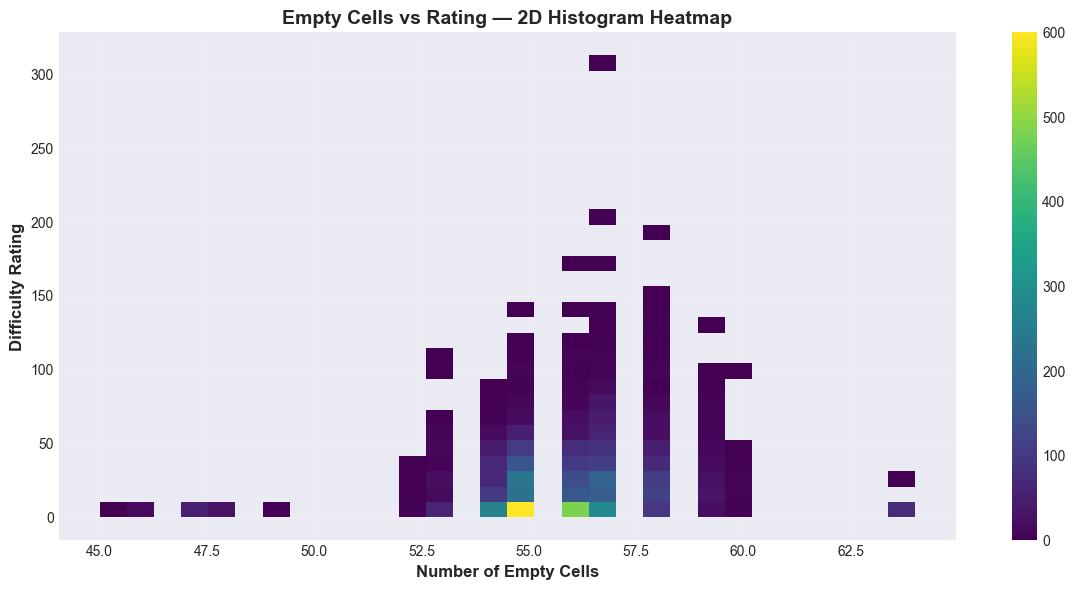


Correlation: 0.15


In [27]:

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='empty_cells',
    y='rating',
    bins=(30, 30),      # adjust bin resolution
    cbar=True,
    cmap='viridis'
)
plt.xlabel('Number of Empty Cells', fontsize=12, fontweight='bold')
plt.ylabel('Difficulty Rating', fontsize=12, fontweight='bold')
plt.title('Empty Cells vs Rating — 2D Histogram Heatmap', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


correlation = df['empty_cells'].corr(df['rating'])
print(f"\nCorrelation: {correlation:.2f}")

In [16]:
# Summary table
summary = df.groupby('difficulty').agg({
    'rating': ['count', 'mean', 'std', 'min', 'max'],
    'empty_cells': ['mean', 'std', 'min', 'max']
}).round(2)

print("📊 STATISTICAL SUMMARY BY DIFFICULTY")
print("=" * 80)
summary

📊 STATISTICAL SUMMARY BY DIFFICULTY


rating                          empty_cells              
            count    mean    std  min  max        mean   std min max
difficulty                                                          
Easy         4471   16.29  14.67    0   50       55.76  2.18  45  64
Expert          2  260.50  74.25  208  313       57.00  0.00  57  57
Hard           50  122.36  21.04  101  197       56.68  1.30  53  59
Medium        477   64.67  12.28   51  100       56.36  1.40  53  60

In [17]:
# Save results
df.to_csv('sudoku_analyzed.csv', index=False)
print("✅ Enhanced dataset saved as 'sudoku_analyzed.csv'")

summary.to_csv('dataset_summary.csv')
print("✅ Summary saved as 'dataset_summary.csv'")

print("\n🎉 Analysis complete!")

✅ Enhanced dataset saved as 'sudoku_analyzed.csv'
✅ Summary saved as 'dataset_summary.csv'

🎉 Analysis complete!
